In [1]:
#This file is for doing some analysis on the data.


#importing required libraries
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup as BS
import requests
import html5lib

import pandas as pd
import os

import json

In [2]:

#Reading the data
pd.set_option('display.max_rows',None)

df_read = pd.read_csv(r'D:\gaurav_data_analyst\Crypto data pull\API.csv')  #for reading the csv file

pd.set_option('display.float_format',lambda x:'%.2f'%x)  #for changing the column float format ,as some columns have displayed data in terms of exponential


In [3]:
#Data Analysis

#FIRST DF:This data grouped by name of currencies with values as mean of the percentage change in the Prices. 
df_1= df_read.groupby('name',sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()

#SECOND DF:This has the above data stacked so that it is easier to visualize (We can have another df too with unstacked data).
df_2 =df_1.stack().to_frame(name='values')  #to_frame is used as df.stack is not a pandas DataFrame datatype.


#THIRD DF:This has the data of Bitcoin's Price as per the Time Stamp
DF = df_read[['name','quote.USD.price','time_stamp']]
df_3 = DF.query("name=='Bitcoin'")


#FOURTH DF:This has the data of Etherum's Price as per the Time Stamp
df_4 = DF.query("name=='Ethereum'")


#FIFTH DF:This has the data of DogeCoin's Price as per the Time Stamp
df_5 = DF.query("name=='Dogecoin'")


In [4]:
df_2=df_2.reset_index()
df_2=df_2.rename(columns={'level_1':'percent_change'})

df_2['percent_change']=df_2['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])

<Figure size 720x576 with 0 Axes>

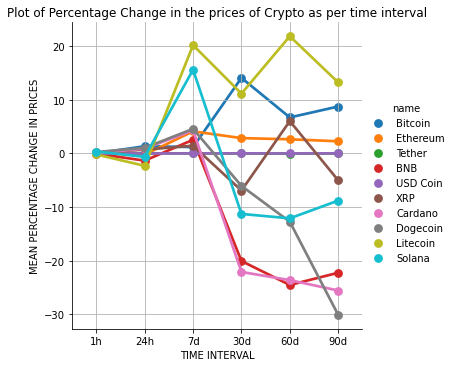

In [5]:
import seaborn as sns
n=10  #visualiation for top 10 crpytocurrencies
plt.figure(figsize=(10,8))
sns.catplot(x='percent_change',y='values',data=df_2.head(n*6),hue='name',kind='point')  
plt.title("Plot of Percentage Change in the prices of Crypto as per time interval")
plt.xlabel("TIME INTERVAL")
plt.ylabel("MEAN PERCENTAGE CHANGE IN PRICES")
plt.grid()
plt.show()


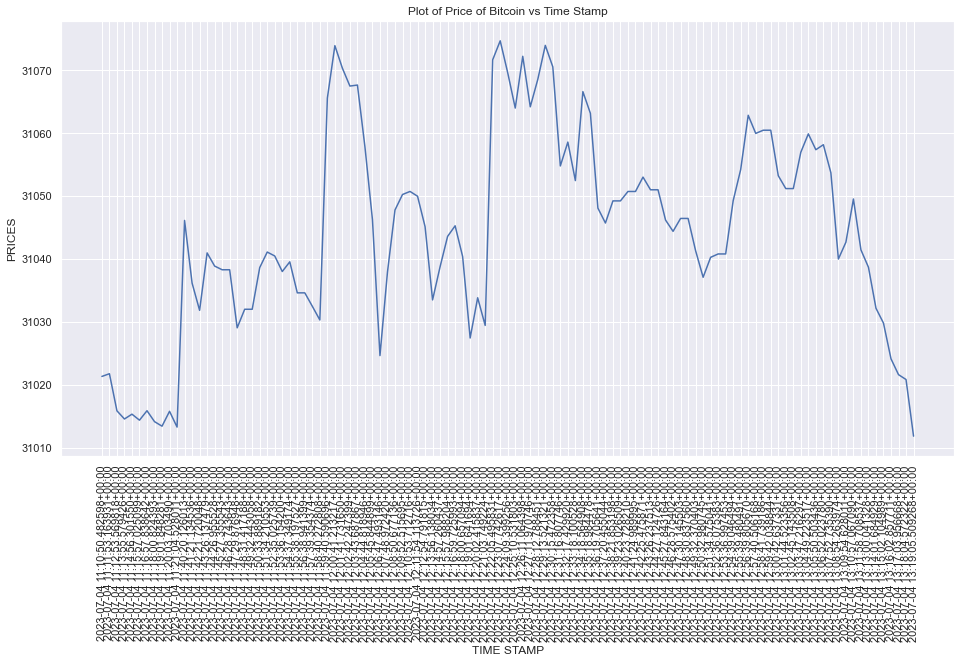

In [6]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(16,8))
sns.lineplot(x='time_stamp', y='quote.USD.price', data = df_3)
plt.title("Plot of Price of Bitcoin vs Time Stamp")
plt.xlabel("TIME STAMP")
plt.xticks(rotation=90)
plt.ylabel("PRICES")
plt.show()

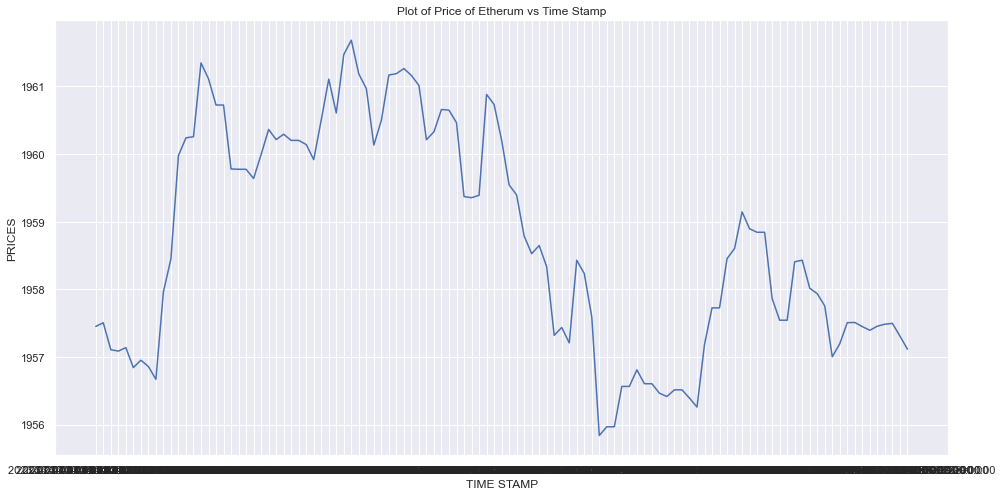

In [7]:
plt.figure(figsize=(16,8))
sns.lineplot(x='time_stamp', y='quote.USD.price', data = df_4)
plt.title("Plot of Price of Etherum vs Time Stamp")
plt.xlabel("TIME STAMP")
plt.ylabel("PRICES")
plt.show()

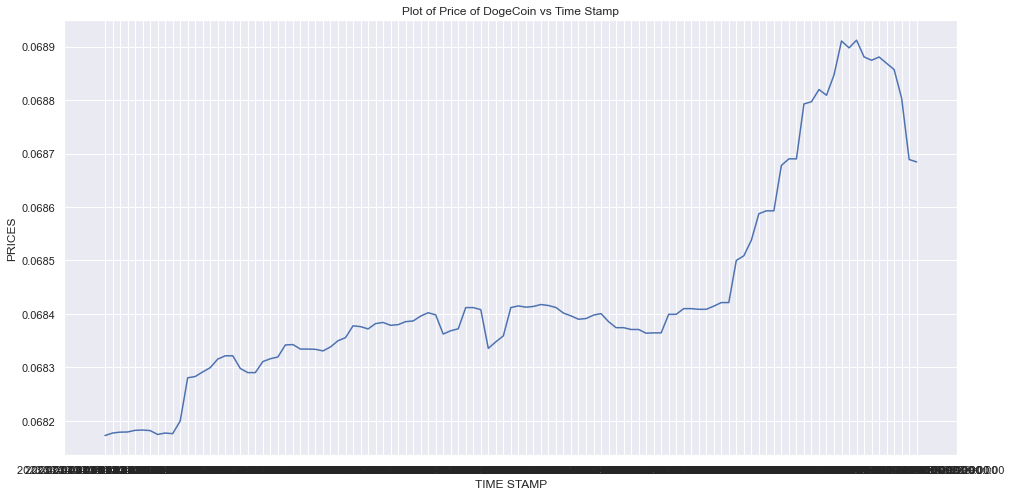

In [8]:
plt.figure(figsize=(16,8))
sns.lineplot(x='time_stamp', y='quote.USD.price', data = df_5)
plt.title("Plot of Price of DogeCoin vs Time Stamp")
plt.xlabel("TIME STAMP")
plt.ylabel("PRICES")
plt.show()